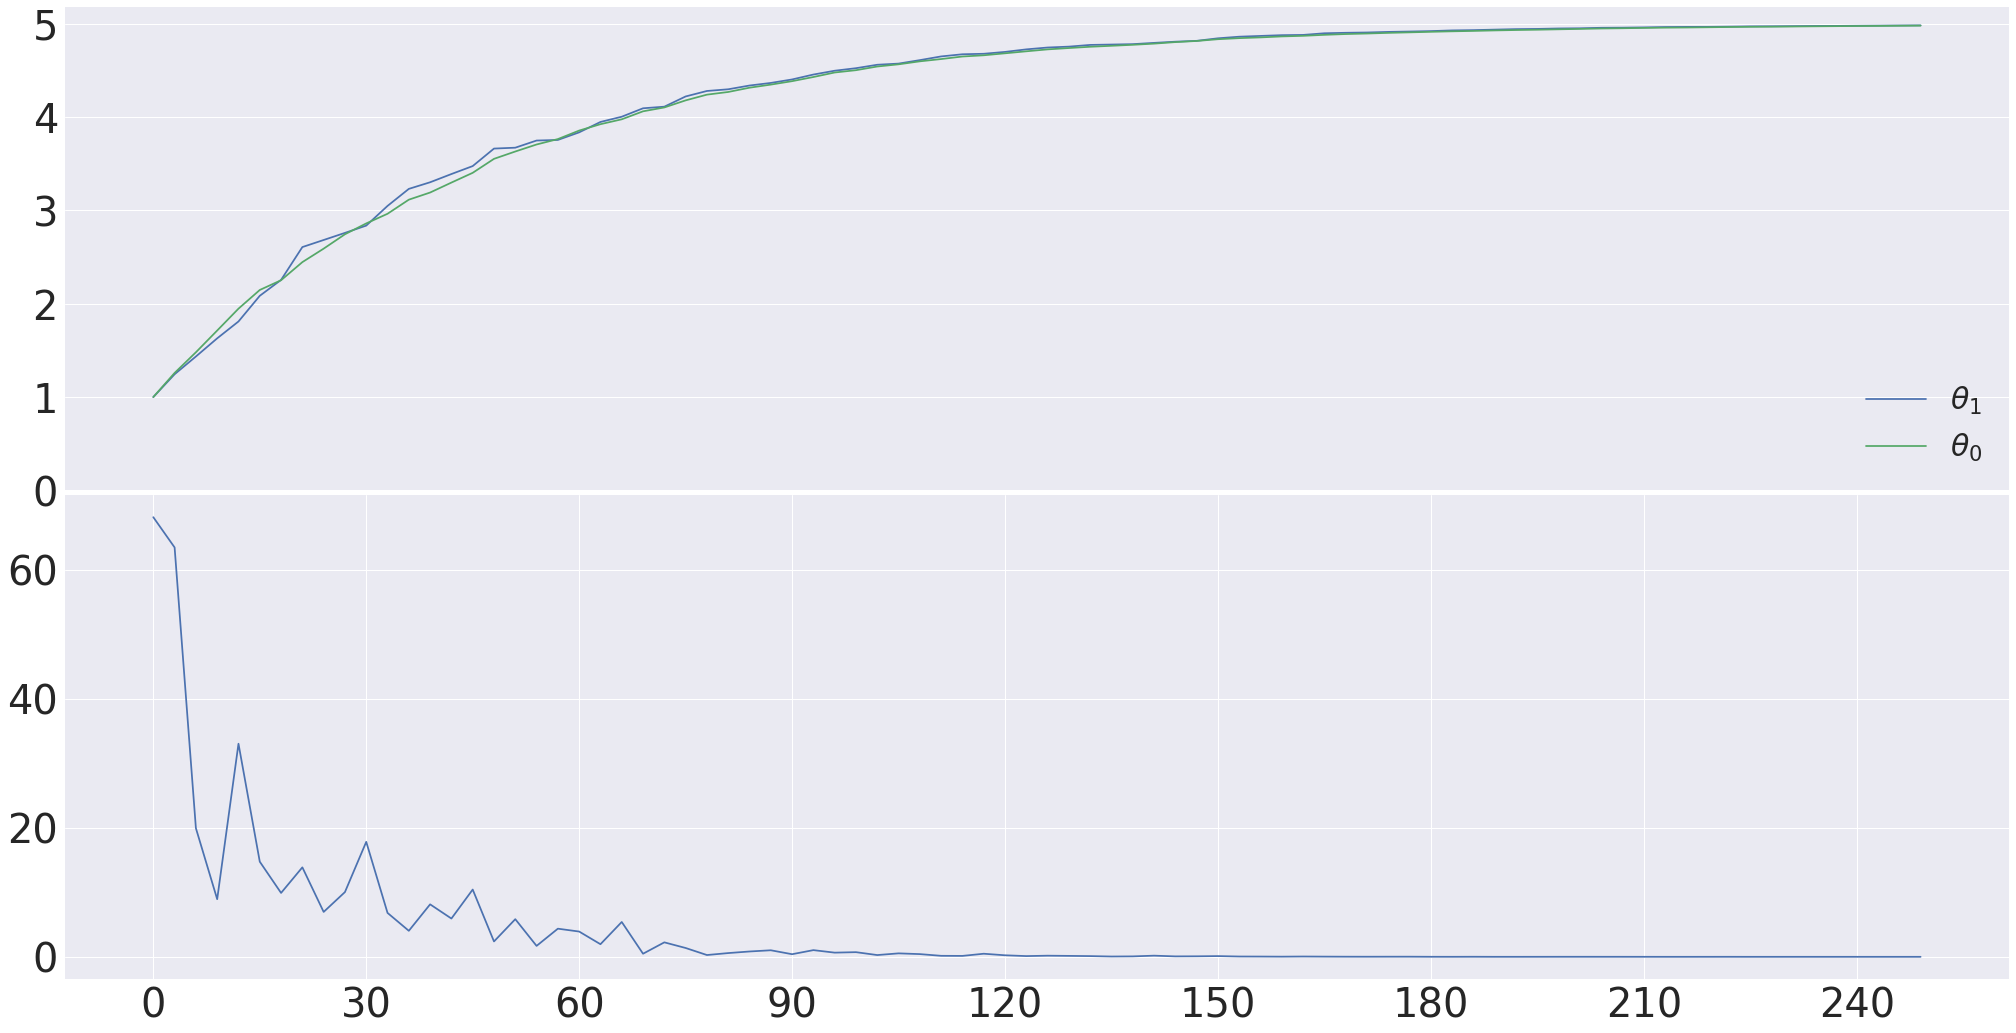

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class dataset_generator: 
    def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient = None
        self._init_set_coefficient()
        
    def _init_set_coefficient(self): 
        self._coefficient = [1 for _ in range(self._feature_dim)] + [0] 
        
    def set_n_sample(self, n_sample): #사용자가 접근할 수 있는 method
        self._n_sample = n_sample #n_sample을 default인 100이 아닌 사용자가 지정한 값으로 지정해줌
        
    def set_noise(self, noise): #사용자가 접근할 수 있는 method
        self._noise = noise
        
    def set_coefficient(self, coefficient_list): #사용자가 접근할 수 있는 method
        self._coefficient = coefficient_list
        
    def make_dataset(self):
        x_data = np.random.normal(0,1, size = (self._n_sample, self._feature_dim))
        y_data = np.zeros(shape = (self._n_sample, 1))
        for feature_idx in range(self._feature_dim):
            y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
            y_data += self._coefficient[-1] #배열 맨 마지막인 bias를 더해줌
            y_data += self._noise * np.random.normal(0,1,size = (self._n_sample, 1))
        return x_data, y_data
    
    
class plus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x + self._y
        return self._z
    
    def backward(self, dz):
        return dz, dz
    
class minus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x - self._y
        return self._z
    
    def backward(self, dz):
        return dz, -1*dz
    
class mul_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x * self._y
        return self._z
    
    def backward(self, dz):
        return dz*self._y, dz*self._x
    
class square_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = self._x * self._x
        return self._z
    
    def backward(self, dz):
        return dz*2*self._x
    
class mean_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = np.mean(self._x) 
        return self._z
    
    def backward(self, dz):
        dx = dz*1/len(self._x)*np.ones_like(self._x)
        return dx
    
    
class SVLR:
    def __init__(self, th1, th0): 
        self.th1, self.th0 = th1, th0
        
        self.th1_list, self.th0_list = [], []
        self.cost_list = []
        
        self.iter_cnt, self.check_cnt = 0, 0
        
        self.model_imp()
        self.cost_imp()
        
    def model_imp(self):
        self.node1 = mul_node()
        self.node2 = plus_node()
        
    def cost_imp(self):
        self.node3 = minus_node()
        self.node4 = square_node()
        self.node5 = mean_node()
        
    def forward(self, mini_batch):
        self.iter_cnt += 1
        
        Z1 = self.node1.forward(self.th1, mini_batch[:,0])
        Z2 = self.node2.forward(Z1, self.th0)
        Z3 = self.node3.forward(mini_batch[:,1], Z2)
        L = self.node4.forward(Z3)
        J = self.node5.forward(L)
        
        if self.iter_cnt % check_freq == 0 or self.iter_cnt == 1:
            self.cost_list.append(J)
            
    def backward(self, lr):
        if self.iter_cnt % check_freq == 0 or self.iter_cnt == 1:
            self.th1_list.append(self.th1)
            self.th0_list.append(self.th0)
            self.check_cnt += 1
            
        dL = self.node5.backward(1)
        dz3 = self.node4.backward(dL)
        dY, dz2 = self.node3.backward(dz3)
        dz1, dTh0 = self.node2.backward(dz2)
        dTh1, dX = self.node1.backward(dz1)
        
        self.th1 = self.th1 - lr*np.sum(dTh1)
        self.th0 = self.th0 - lr*np.sum(dTh0)
        
    def result_visualization(self):
        fig, ax = plt.subplots(2,1,figsize = (30,15))
        ax[0].plot(self.th1_list, label = r'$\theta_{1}$')
        ax[0].plot(self.th0_list, label = r'$\theta_{0}$')
        ax[1].plot(self.cost_list)
        ax[0].legend(loc = 'lower right', fontsize = 30)
        
        fig.subplots_adjust(top = 0.95, bottom = 0.05, left = 0.05, right = 0.95, hspace = 0.01)
        ax[0].axes.get_xaxis().set_visible(False)
        ax[0].axes.get_xaxis().set_visible(False)
        
        
        x_ticks = np.arange(0, self.check_cnt, 10).astype(int)
        x_ticklabels = x_ticks*check_freq
        y_ticks = np.arange(0,t_th0 + 0.5)
        
        ax[1].set_xticks(x_ticks)
        ax[1].set_xticklabels(x_ticklabels)
        ax[0].set_yticks(y_ticks)

        
        ax[0].tick_params(axis = 'both', labelsize = 40)
        ax[1].tick_params(axis = 'both', labelsize = 40)

        #ax[0].set_title(r'$\theta_{1}$, \theta_{0}$', fontsize = 30)

        

def get_data_batch(data, batch_idx):
    if batch_idx is n_batch - 1:
        batch = data[batch_idx*batch_size : ]
    else:
        batch = data[batch_idx*batch_size : (batch_idx + 1)*batch_size]
    return batch

plt.style.use('seaborn')
np.random.seed(0)

t_th1, t_th0 = 5, 5
th1, th0 = 1, 1

distribution_params = {'feature_0' : {'mean':0, 'std':1}}

lr = 0.01
epochs = 10
batch_size = 4
check_freq = 3

dataset_gen = dataset_generator()

dataset_gen.set_coefficient([t_th1, t_th0])
#dataset_gen.set_distribution_params({t_th1, t_th0})

x_data, y_data = dataset_gen.make_dataset()
data = np.hstack((x_data, y_data))
n_batch = np.ceil(data.shape[0]/batch_size).astype(int)

model = SVLR(th1, th0)

for epoch in range(epochs):
    np.random.shuffle(data)
    
    for batch_idx in range(n_batch):
        batch = get_data_batch(data, batch_idx)
        
        model.forward(batch)
        model.backward(lr)
        
model.result_visualization()



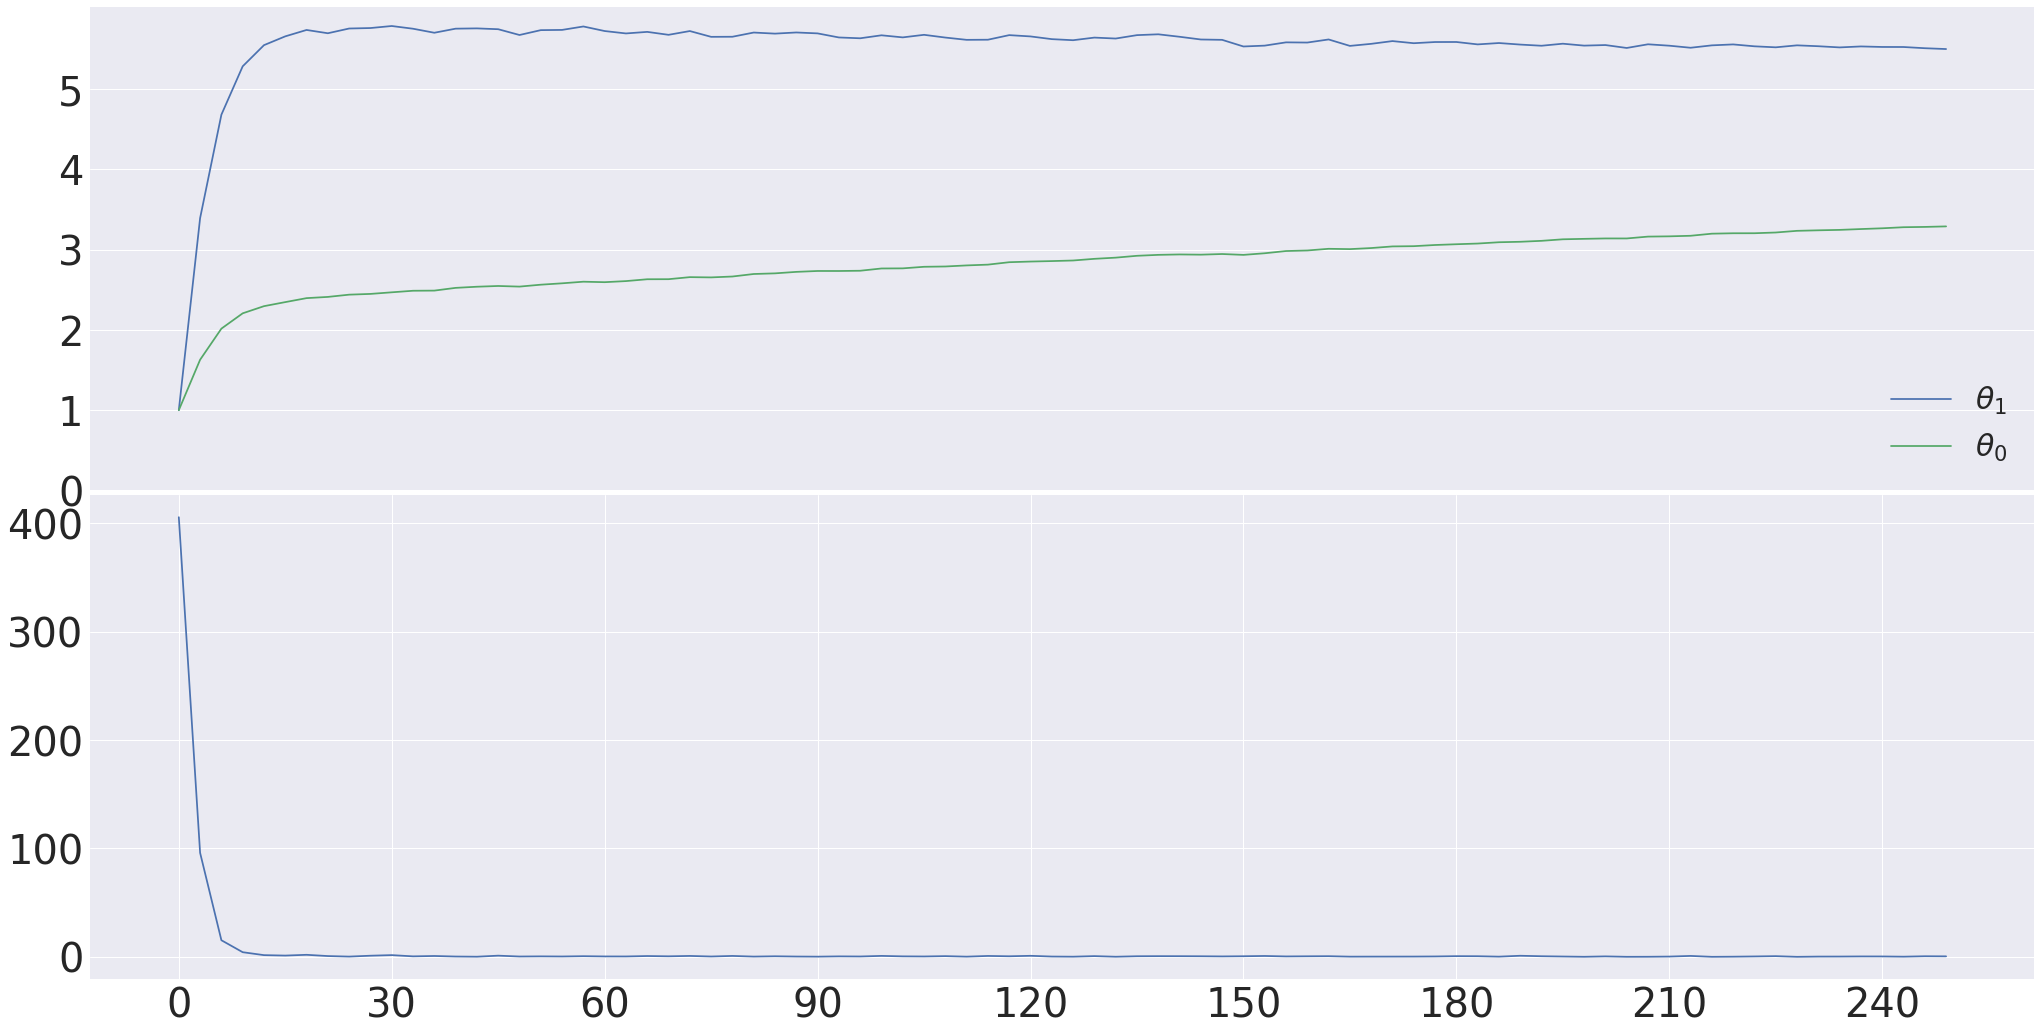

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class dataset_generator: 
    def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient = None
        self._init_set_coefficient()
        
    def _init_set_coefficient(self): 
        self._coefficient = [1 for _ in range(self._feature_dim)] + [0] 
        
    def set_n_sample(self, n_sample): #사용자가 접근할 수 있는 method
        self._n_sample = n_sample #n_sample을 default인 100이 아닌 사용자가 지정한 값으로 지정해줌
        
    def set_noise(self, noise): #사용자가 접근할 수 있는 method
        self._noise = noise
        
    def set_coefficient(self, coefficient_list): #사용자가 접근할 수 있는 method
        self._coefficient = coefficient_list
        
    def make_dataset(self):
        x_data = np.random.normal(3,1, size = (self._n_sample, self._feature_dim))
        y_data = np.zeros(shape = (self._n_sample, 1))
        for feature_idx in range(self._feature_dim):
            y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
            y_data += self._coefficient[-1] #배열 맨 마지막인 bias를 더해줌
            y_data += self._noise * np.random.normal(0,1,size = (self._n_sample, 1))
        return x_data, y_data
    
    
class plus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x + self._y
        return self._z
    
    def backward(self, dz):
        return dz, dz
    
class minus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x - self._y
        return self._z
    
    def backward(self, dz):
        return dz, -1*dz
    
class mul_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x * self._y
        return self._z
    
    def backward(self, dz):
        return dz*self._y, dz*self._x
    
class square_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = self._x * self._x
        return self._z
    
    def backward(self, dz):
        return dz*2*self._x
    
class mean_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = np.mean(self._x) 
        return self._z
    
    def backward(self, dz):
        dx = dz*1/len(self._x)*np.ones_like(self._x)
        return dx
    
    
class SVLR:
    def __init__(self, th1, th0): 
        self.th1, self.th0 = th1, th0
        
        self.th1_list, self.th0_list = [], []
        self.cost_list = []
        
        self.iter_cnt, self.check_cnt = 0, 0
        
        self.model_imp()
        self.cost_imp()
        
    def model_imp(self):
        self.node1 = mul_node()
        self.node2 = plus_node()
        
    def cost_imp(self):
        self.node3 = minus_node()
        self.node4 = square_node()
        self.node5 = mean_node()
        
    def forward(self, mini_batch):
        self.iter_cnt += 1
        
        Z1 = self.node1.forward(self.th1, mini_batch[:,0])
        Z2 = self.node2.forward(Z1, self.th0)
        Z3 = self.node3.forward(mini_batch[:,1], Z2)
        L = self.node4.forward(Z3)
        J = self.node5.forward(L)
        
        if self.iter_cnt % check_freq == 0 or self.iter_cnt == 1:
            self.cost_list.append(J)
            
    def backward(self, lr):
        if self.iter_cnt % check_freq == 0 or self.iter_cnt == 1:
            self.th1_list.append(self.th1)
            self.th0_list.append(self.th0)
            self.check_cnt += 1
            
        dL = self.node5.backward(1)
        dz3 = self.node4.backward(dL)
        dY, dz2 = self.node3.backward(dz3)
        dz1, dTh0 = self.node2.backward(dz2)
        dTh1, dX = self.node1.backward(dz1)
        
        self.th1 = self.th1 - lr*np.sum(dTh1)
        self.th0 = self.th0 - lr*np.sum(dTh0)
        
    def result_visualization(self):
        fig, ax = plt.subplots(2,1,figsize = (30,15))
        ax[0].plot(self.th1_list, label = r'$\theta_{1}$')
        ax[0].plot(self.th0_list, label = r'$\theta_{0}$')
        ax[1].plot(self.cost_list)
        ax[0].legend(loc = 'lower right', fontsize = 30)
        
        fig.subplots_adjust(top = 0.95, bottom = 0.05, left = 0.05, right = 0.95, hspace = 0.01)
        ax[0].axes.get_xaxis().set_visible(False)
        ax[0].axes.get_xaxis().set_visible(False)
        
        
        x_ticks = np.arange(0, self.check_cnt, 10).astype(int)
        x_ticklabels = x_ticks*check_freq
        y_ticks = np.arange(0,t_th0 + 0.5)
        
        ax[1].set_xticks(x_ticks)
        ax[1].set_xticklabels(x_ticklabels)
        ax[0].set_yticks(y_ticks)

        
        ax[0].tick_params(axis = 'both', labelsize = 40)
        ax[1].tick_params(axis = 'both', labelsize = 40)

        #ax[0].set_title(r'$\theta_{1}$, \theta_{0}$', fontsize = 30)

        

def get_data_batch(data, batch_idx):
    if batch_idx is n_batch - 1:
        batch = data[batch_idx*batch_size : ]
    else:
        batch = data[batch_idx*batch_size : (batch_idx + 1)*batch_size]
    return batch

plt.style.use('seaborn')
np.random.seed(0)

t_th1, t_th0 = 5, 5
th1, th0 = 1, 1

distribution_params = {'feature_0' : {'mean':0, 'std':1}}

lr = 0.01
epochs = 10
batch_size = 4
check_freq = 3

dataset_gen = dataset_generator()

dataset_gen.set_coefficient([t_th1, t_th0])
#dataset_gen.set_distribution_params({t_th1, t_th0})

x_data, y_data = dataset_gen.make_dataset()
data = np.hstack((x_data, y_data))
n_batch = np.ceil(data.shape[0]/batch_size).astype(int)

model = SVLR(th1, th0)

for epoch in range(epochs):
    np.random.shuffle(data)
    
    for batch_idx in range(n_batch):
        batch = get_data_batch(data, batch_idx)
        
        model.forward(batch)
        model.backward(lr)
        
model.result_visualization()

